![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 13 - Bayesian Regression </center>
### <center> Linear Bayesian Regression </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/13_BayesianRegression/MainBayesianRegreesion.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Generate some data:
$$\mathcal{D}_{\text{train}}=\left\{ \left(x_{i},y_{i}\right)\right\} _{i=1}^{N}$$
$$y_{i}=f\left(x_{i}\right)+\epsilon_{i}$$
$$f\left(x\right)=2\left(x+1\right)x\left(x-1\right)$$

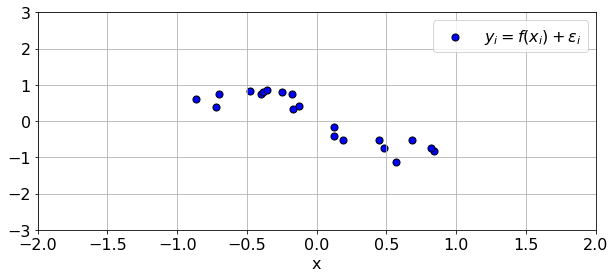

In [2]:
def f(vX):
    return 2 * (vX + 1) * vX * (vX - 1)

N   = 20
σ_ε = 0.2
vX  = 1.8 * (np.random.rand(N) - 1/2)
vY  = f(vX) + σ_ε * np.random.randn(N)

plt.figure(figsize=(10, 4))
plt.scatter(vX, vY, s=50, c='b', edgecolor='k', label='$y_i = f(x_i) + \epsilon_i$')
plt.xlabel('x')
plt.xlim([-2, 2])
plt.ylim([-3, 3])
plt.grid()
plt.legend()
plt.show()

### Compute $\boldsymbol{\phi}\left(x\right)$ and $\boldsymbol{\Phi}$:
$$\boldsymbol{\phi}\left(x\right)=\left[\begin{matrix}1\\
x\\
x^{2}\\
x^{3}
\end{matrix}\right]$$
$$\boldsymbol{\Phi}=\left[\begin{matrix}| & | &  & |\\
\boldsymbol{\phi}\left(\boldsymbol{x}_{1}\right) & \boldsymbol{\phi}\left(\boldsymbol{x}_{2}\right) & \cdots & \boldsymbol{\phi}\left(\boldsymbol{x}_{N}\right)\\
| & | &  & |
\end{matrix}\right]\in\mathbb{R}^{4\times N}$$

In [3]:
from sklearn.preprocessing import PolynomialFeatures

mΦ = PolynomialFeatures(degree=3).fit_transform(vX[:,None]).T

### Compute $\hat{\boldsymbol{w}}_{\text{MAP}}$ and $\boldsymbol{\Sigma}_{\text{MAP}}$:
$$\boldsymbol{\Sigma}_{\text{MAP}}=\left(\frac{1}{\sigma_{\epsilon}^{2}}\boldsymbol{\Phi}\boldsymbol{\Phi}^{T}+\frac{1}{\sigma_{w}^{2}}\boldsymbol{I}\right)^{-1}$$
\begin{align*}
\hat{\boldsymbol{w}}_{\text{MAP}} & =\left(\boldsymbol{\Phi}\boldsymbol{\Phi}^{T}+\frac{\sigma_{\epsilon}^{2}}{\sigma_{w}^{2}}\boldsymbol{I}\right)^{-1}\boldsymbol{\Phi}\boldsymbol{y}\\
 & =\frac{1}{\sigma_{\epsilon}^{2}}\boldsymbol{\Sigma}_{\mathrm{MAP}}\boldsymbol{\Phi}\boldsymbol{y}
\end{align*}

In [4]:
σ_w    = 1 #-- regulariztion
mΣmap  = np.linalg.inv(mΦ @ mΦ.T / σ_ε**2 + np.eye(4) / σ_w**2)
vWmap  = 1 / σ_ε**2 * mΣmap @ mΦ @ vY[:,None]

### For each $x_0$ compute $f_{Y_{0}|\underline{Y}}\left(y_{0}|\boldsymbol{y}\right)$:
$$\boxed{f_{Y_{0}|\underline{Y}}\left(y_{0}|\boldsymbol{y}\right)=\mathcal{N}\left(y_{0}|\mu_{y_{0}},\sigma_{y_{0}}^{2}\right)}$$
$$\mu_{y_{0}}=\boldsymbol{\phi}\left(x_{0}\right)^{T}\hat{\boldsymbol{w}}_{\text{MAP }}$$
$$\sigma_{y_{0}}^{2}=\boldsymbol{\phi}\left(x_{0}\right)^{T}\boldsymbol{\Sigma}_{\text{MAP}}\boldsymbol{\phi}\left(x_{0}\right)+\sigma_{\epsilon}^{2}$$

In [5]:
K     = 1001;
vX0   = np.linspace(-1.8, 1.8, K);
mΦ0   = PolynomialFeatures(degree=3).fit_transform(vX0[:,None]).T

vY0   = (mΦ0.T @ vWmap).squeeze()
vVar0 = np.sum((mΦ0.T @ mΣmap) * mΦ0.T, axis=1) + σ_ε**2
vσ0   = np.sqrt(vVar0)

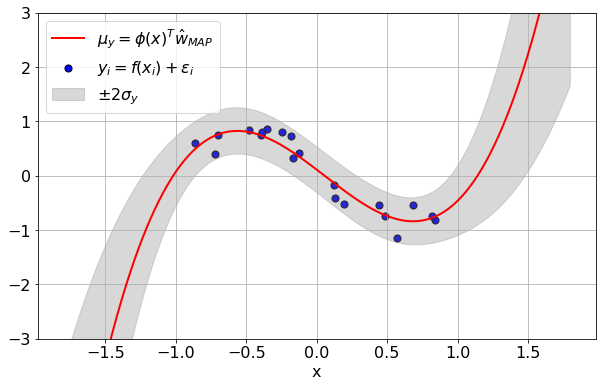

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(vX, vY, s=50, c='b', edgecolor='k',                          label='$y_i = f(x_i) + \epsilon_i$')
plt.plot(vX0, vY0, 'r', lw=2,                                            label='$\mu_{y} = \phi(x)^T \hat{w}_{MAP}$')
plt.fill_between(vX0, vY0 - 2*vσ0, vY0 + 2*vσ0, color='gray', alpha=0.3, label='$\pm 2\sigma_{y}$')
plt.xlabel('x')
plt.ylim([-3, 3])
plt.grid()
plt.legend()
plt.show()

### Put it all together:

In [7]:
N2  = 100
vX2 = 2 * (np.random.rand(N2) - 1/2)
vZ  = np.random.randn(N2)

def PlotBayesianRegression(N, σ_ε, σ_w):      
    vX  = vX2[:N]
    vY  = f(vX) + σ_ε * vZ[:N]
    
    mΦ    = PolynomialFeatures(degree=3).fit_transform(vX[:,None]).T
    mΣmap = np.linalg.inv(mΦ @ mΦ.T / σ_ε**2 + np.eye(4) / σ_w**2)
    vWmap = 1 / σ_ε**2 * mΣmap @ mΦ @ vY[:,None]
    
    vY0   = (mΦ0.T @ vWmap).squeeze()
    vVar0 = np.sum((mΦ0.T @ mΣmap) * mΦ0.T, axis=1) + σ_ε**2
    vσ0   = np.sqrt(vVar0)
    
    #-- Plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(vX, vY, s=50, c='b', edgecolor='k',                          label='$y_i = f(x_i) + \epsilon_i$')
    plt.plot(vX0, f(vX0), 'c', lw=2,                                         label='$f(x)= \phi(x)^T w$')
    plt.plot(vX0, vY0,    'r', lw=2,                                         label='$\mu_{y} = \phi(x)^T \hat{w}_{MAP}$')
    plt.fill_between(vX0, vY0 - 2*vσ0, vY0 + 2*vσ0, color='gray', alpha=0.3, label='$\pm 2\sigma_{y}$')
    plt.xlabel('x')
    plt.ylim([-3, 3])
    plt.grid()
    plt.legend()    

In [8]:
from ipywidgets import interact, IntSlider, FloatSlider, Layout

nSlider  = IntSlider  (min=1,    max=N2, step=1,    value=1,    layout=Layout(width='80%'))
σεSlider = FloatSlider(min=0.05, max=1,  step=0.05, value=0.05, layout=Layout(width='80%'))
σwSlider = FloatSlider(min=0.05, max=1,  step=0.05, value=1,    layout=Layout(width='80%'))
interact(PlotBayesianRegression, N=nSlider, σ_ε=σεSlider, σ_w=σwSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='N', layout=Layout(width='80%'), min=1), FloatSlider(valu…